# House Prices EDA

### Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
#packages
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

In [3]:
#Observe a sample of the data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Management/Research Question: How do the attributes of a property for sale influence its eventual sale price?

### 1. Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.

In [4]:
#Let's look at the basic measures of central tendency on SalePrice
df['SalePrice'].describe()
print('Kurtosis: ', sp.stats.kurtosis(df['SalePrice']))
print('Skew: ', sp.stats.skew(df['SalePrice']))

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Kurtosis:  6.509812011089439
Skew:  1.880940746034036


#### These values show an obvious positive skew and leptokurtic distribution.

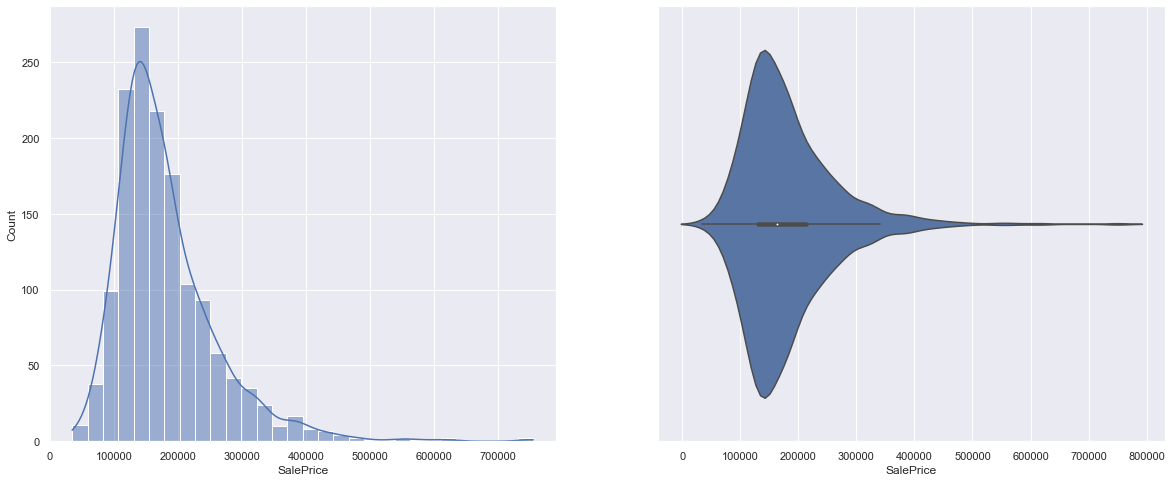

In [5]:
#We can visually see this.
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.histplot(data=df, x='SalePrice', bins=30, kde=True, ax=axes[0]);
sns.violinplot(data=df, x='SalePrice', ax=axes[1]);

#### SalePrice is clearly not normal. What distribution is it?

,sumsquare_error,aic,bic,kl_div
laplace_asymmetric,1.834175e-11,3075.803373,-46709.869866,inf
johnsonsu,1.864529e-11,3061.307944,-46678.619113,inf
exponnorm,1.927716e-11,3097.639427,-46637.247595,inf
alpha,2.536949e-11,3080.400549,-46236.292899,inf
fisk,2.582604e-11,3069.347358,-46210.252544,inf


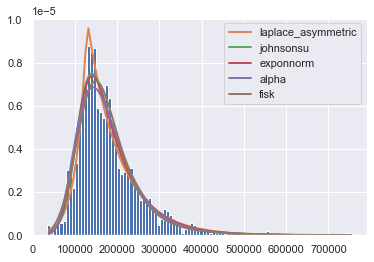

In [6]:
from fitter import Fitter
f=Fitter(df['SalePrice'])
f.fit()
f.summary()

#### Although the asymmetric laplace distribution is rated the best, it is not a smooth function and unlikely to accurately represent SalePrice. Since the exponentially modified Gaussian distribution is rated as a good fit, we can transform SalePrice with a log function to get a more normal distribution.

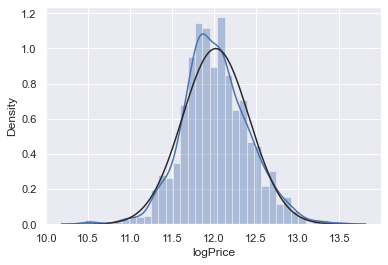

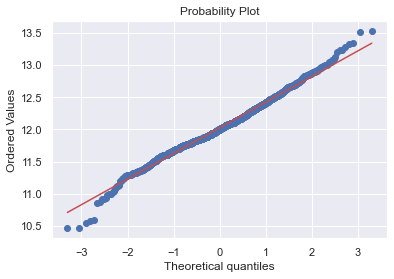

In [6]:
#use log1p to apply log(1+x) to everything in SalePrice
df['logPrice']=np.log1p(df['SalePrice'])
sns.distplot(df['logPrice'], fit=sp.stats.norm);

fig = plt.figure()
res = sp.stats.probplot(df['logPrice'], plot=plt)
plt.show();

#### logPrice is a pretty good transformation of SalePrice into a normal distribution

### 2. Investigate missing data and outliers.

In [7]:
#Are there any duplicated rows?
df[df.duplicated()]
#Empty dataframe means no.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,logPrice


In [8]:
#Lets look at the feature columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
#lots of columns, how many missinge values are there?
missing=df.isnull().sum()
missing=missing[missing > 0]
missing.sort_values(inplace=True)
missing

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

#### There is 1460 rows in the training set, and some of these columns with a lot of nulls might be related to other columns.

In [10]:
df['PoolArea'].value_counts()

0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64

#### For example, 1453 NaN cells in the PoolQC column correspond to the 1453 rows with 0 PoolArea, indicating these houses have no pool. 

#### We need to decide whether NaN is meaningful or just missing data.

#### Electrical only has 1 row with a missing value, so we can remove the row and keep the variable.  

#### MasVnrType includes a None option, so we can remove those 8 rows as well.

#### The Bsmt_ basement related variables are likely interrelated. We will keep those rows as units without a basement. Similarly for Garage_ garage-related variables and variables with majority NaN.

In [11]:
df=df.dropna(subset=['Electrical', 'MasVnrType'])

### 3. Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.

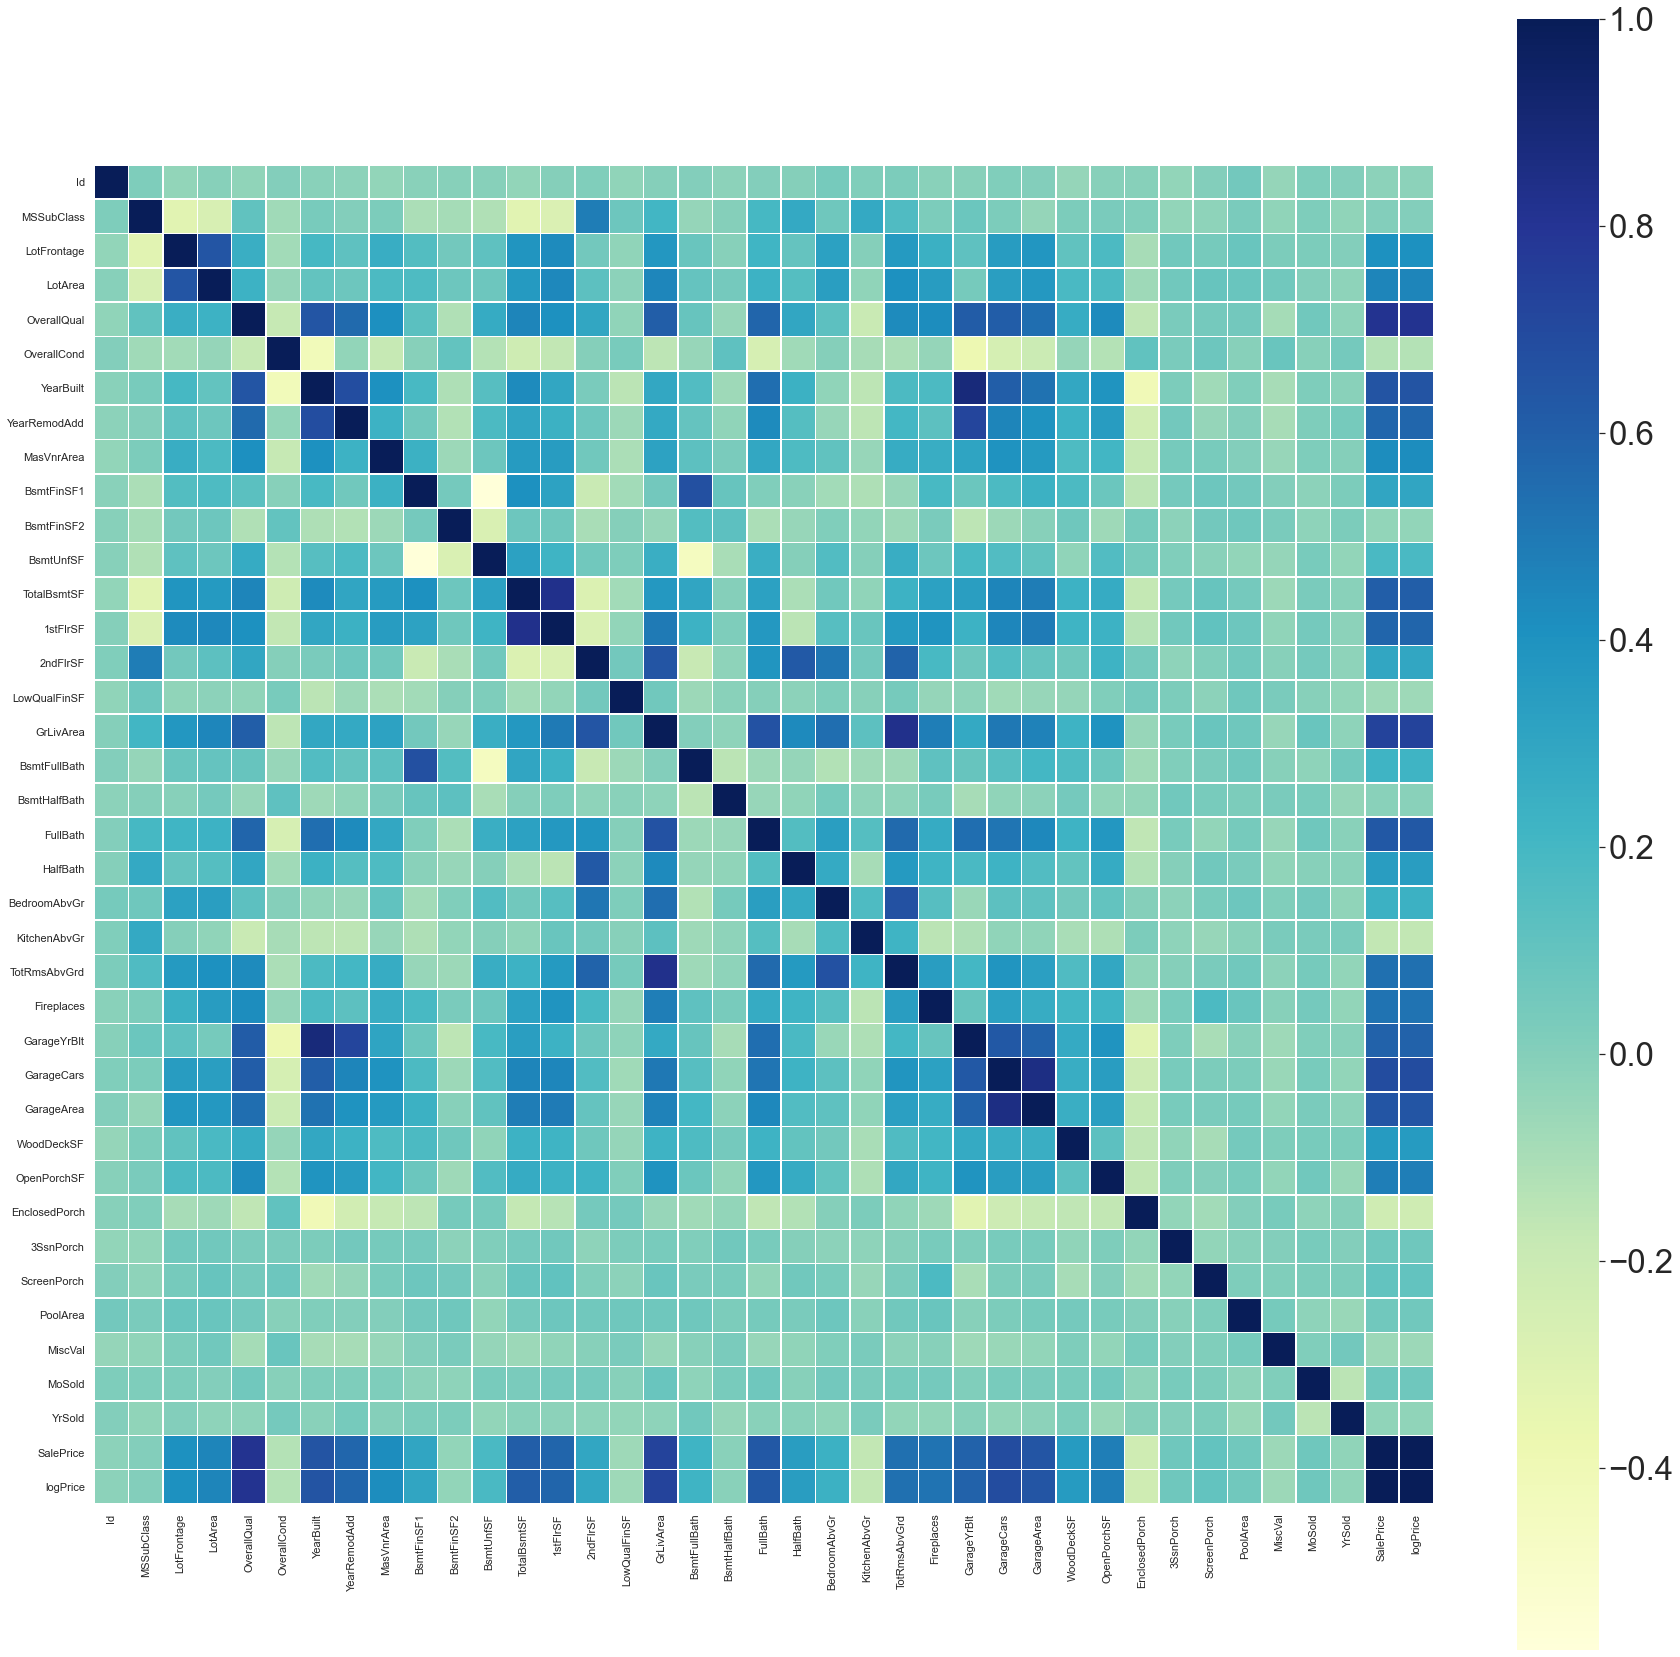

In [12]:
#Let's make a big heatmap to have a first look at correlations between variables. 
#Using Spearman's correlation since there are quite a few non-linear variables.
f, ax = plt.subplots(figsize=(30, 30))
sns.set(font_scale=3)
sns.heatmap(df.corr(method='spearman'), vmax=1, square=True, linewidths=.5, cmap="YlGnBu");

#### We can immediately see that OverallQual, area-related variables, and garage-related variables have strong correlations with SalePrice.

In [13]:
#Let's look at the variables most correlated with SalePrice.
df.corr(method='spearman').nlargest(20, 'logPrice')['logPrice']

SalePrice       1.000000
logPrice        1.000000
OverallQual     0.809477
GrLivArea       0.731096
GarageCars      0.690073
YearBuilt       0.652576
GarageArea      0.648808
FullBath        0.635896
TotalBsmtSF     0.603145
GarageYrBlt     0.593102
1stFlrSF        0.576567
YearRemodAdd    0.570768
TotRmsAbvGrd    0.533715
Fireplaces      0.521201
OpenPorchSF     0.476978
LotArea         0.457572
MasVnrArea      0.421500
LotFrontage     0.409041
WoodDeckSF      0.355873
HalfBath        0.341811
Name: logPrice, dtype: float64

#### Select variables to look at 'OverallQual', 'GrLivArea', 'GarageArea', 'YearBuilt', 'FullBath', 'TotalBsmtSF', 'TotRmsAbvGrd', '1stFlrSF',

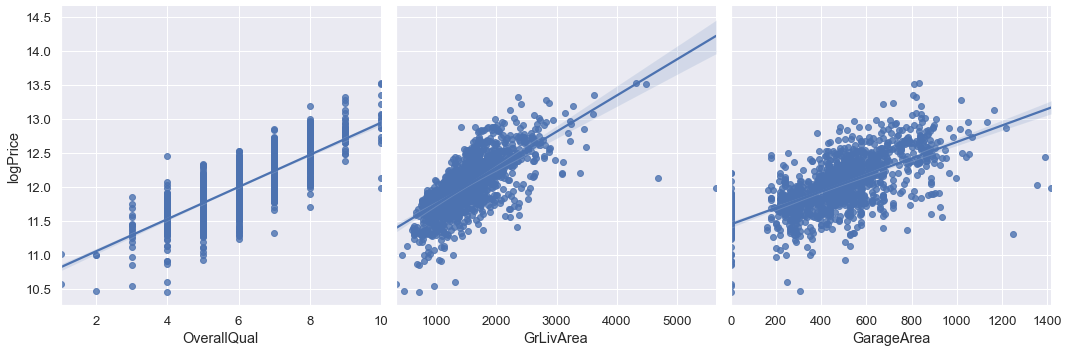

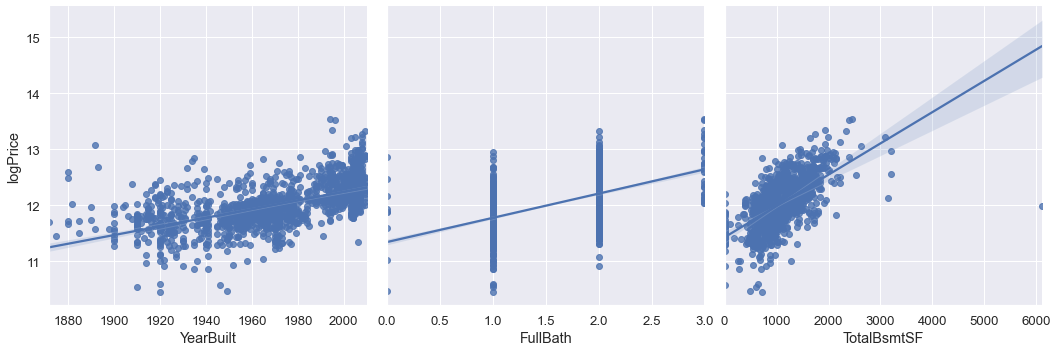

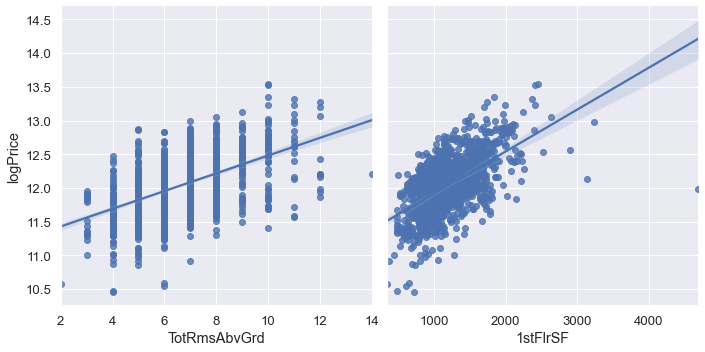

In [15]:
sns.pairplot(data=df, x_vars=['OverallQual', 'GrLivArea', 'GarageArea'], y_vars=['logPrice'], height=5, aspect=1, kind='reg');
sns.pairplot(data=df, x_vars=['YearBuilt', 'FullBath', 'TotalBsmtSF'], y_vars=['logPrice'], height=5, aspect=1, kind='reg');
sns.pairplot(data=df, x_vars=['TotRmsAbvGrd', '1stFlrSF'], y_vars=['logPrice'], height=5, aspect=1, kind='reg');
sns.set(font_scale=1.2);

#### GrLivArea, GarageArea, TotalBsmtSF, and 1stFlrSF are all area-related variables that show linear relationships with SalePrice. GarageArea and TotalBsmtSF shows several data points at 0, indicating SalesPrice of homes without garages or basements may be limited to a small range. GrLivArea shoes a better linear relationship with SalePrice than 1stFlrSF, which is expected, since 1stFlrSF likely has significant overlap with GrLivArea.

#### For the categorical variables, OverallQual is a good predictor, while FullBath and TotRmsAbvGrd have a wide range of SalePrice in their middle categories. 

#### YearBuilt is an especially interesting variable. There seems to be a general trend that newer houses tend to cost more. However, it is unknown if SalePrice is corrected for inflation.

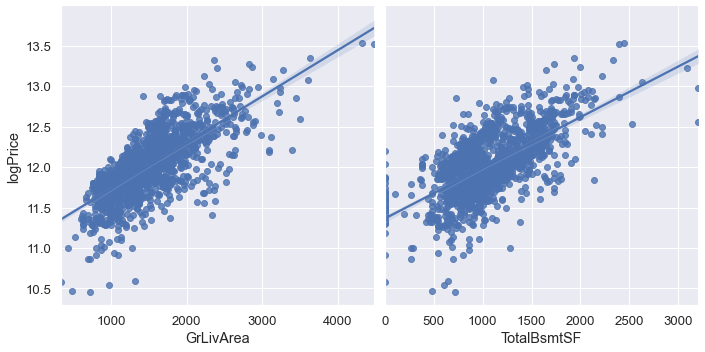

In [16]:
#Remove outliers for GrLivArea and TotalBsmtSF
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)
df = df.drop(df[(df['TotalBsmtSF']>5000) & (df['TotalBsmtSF']<200000)].index)
sns.pairplot(data=df, x_vars=['GrLivArea', 'TotalBsmtSF'], y_vars=['logPrice'], height=5, aspect=1, kind='reg');

### 4. Engage in feature creation by splitting, merging, or otherwise generating a new predictor.

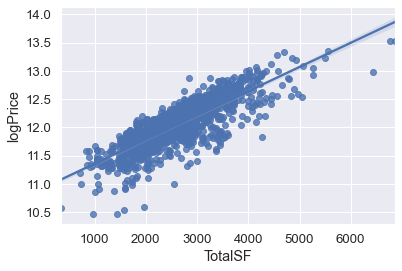

In [17]:
#We can add a feature of TotalSF
df['TotalSF']=df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']
sns.regplot(data=df, x='TotalSF', y='logPrice');

In [24]:
#Looks like an excellent predictor.
df1=df[['TotalSF', 'OverallQual', 'GrLivArea', 'SalePrice', 'logPrice']]

### 5. Using the dependent variable, perform both min-max and standard scaling in Python.

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler=MinMaxScaler()
scaler=scaler.fit(df1[['logPrice']])
df1_scaled=scaler.transform(df1[['logPrice']])

In [45]:
scaler=StandardScaler()
scaler=scaler.fit(df1_scaled)
df1_scaled=scaler.transform(df1_scaled)

<AxesSubplot:>

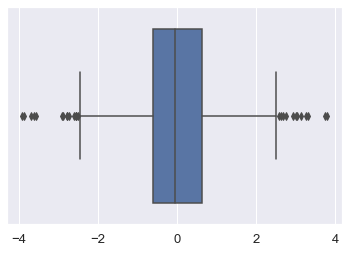

In [46]:
sns.boxplot(df1_scaled)

In [49]:
df['ScaledPrice']=df1_scaled

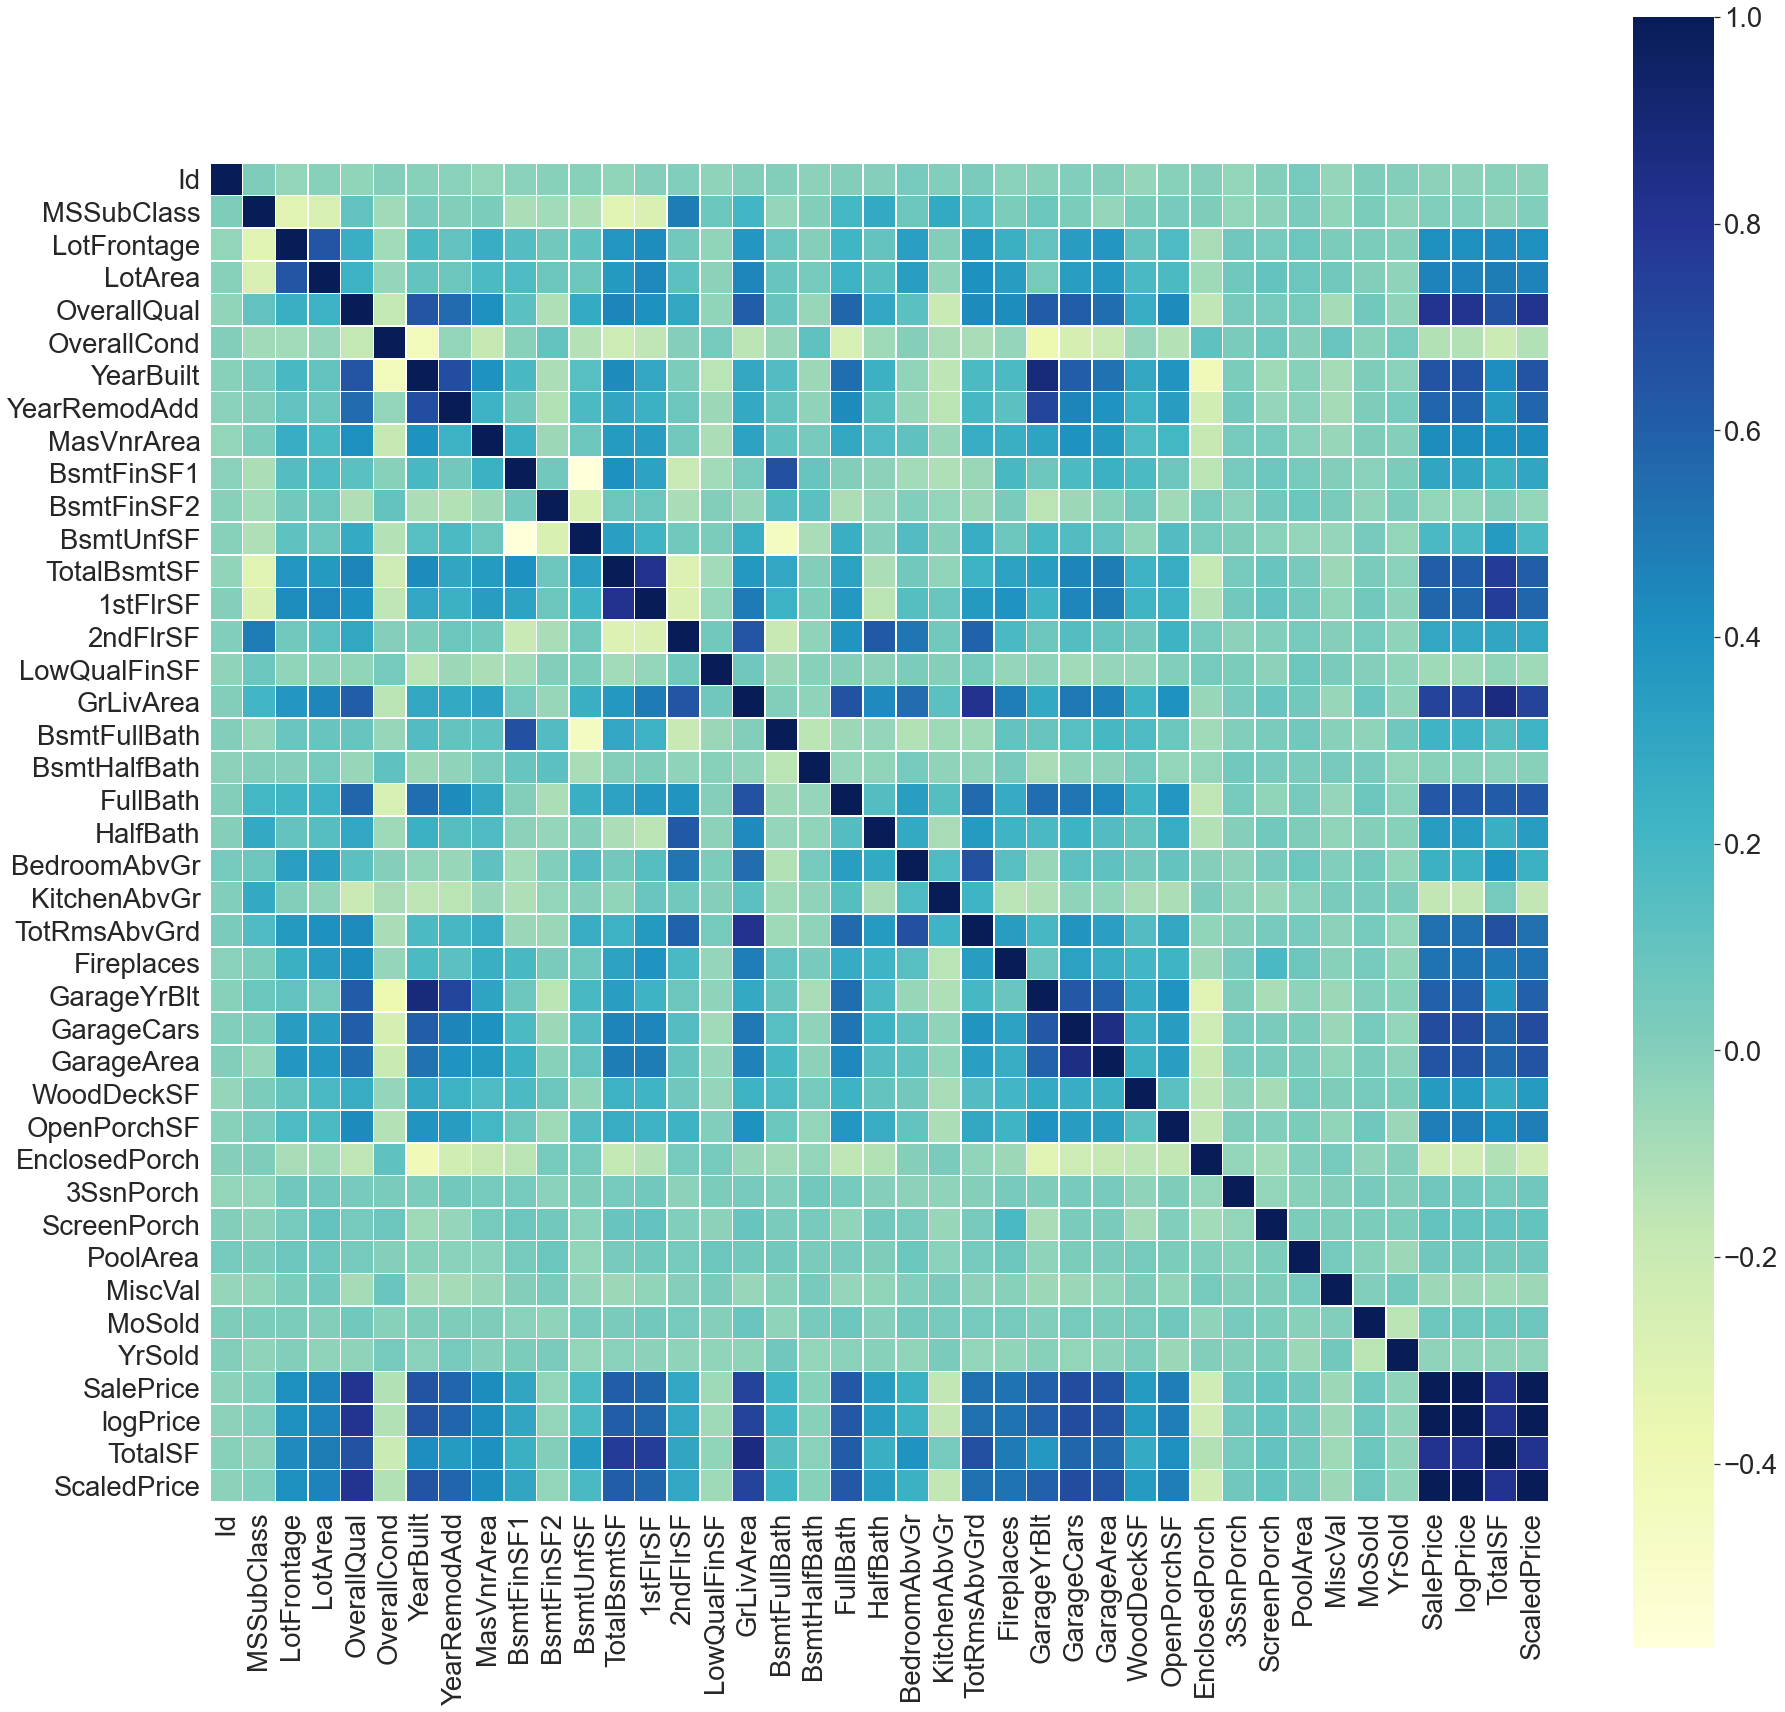

In [53]:
f, ax = plt.subplots(figsize=(30, 30))
sns.set(font_scale=2.5)
sns.heatmap(df.corr(method='spearman'), vmax=1, square=True, linewidths=.5, cmap="YlGnBu");